<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Масштабируем-признаки" data-toc-modified-id="Масштабируем-признаки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Масштабируем признаки</a></span></li><li><span><a href="#Рассчитаем-Accuracy" data-toc-modified-id="Рассчитаем-Accuracy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Рассчитаем Accuracy</a></span></li><li><span><a href="#Рассчитаем-auc-roc" data-toc-modified-id="Рассчитаем-auc-roc-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Рассчитаем auc-roc</a></span></li><li><span><a href="#Рассчитаем-F1-мерики" data-toc-modified-id="Рассчитаем-F1-мерики-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Рассчитаем F1 мерики</a></span></li><li><span><a href="#Посмотрим-на-дисбаланс" data-toc-modified-id="Посмотрим-на-дисбаланс-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Посмотрим на дисбаланс</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Посчитаем-AUC-ROC-и-выведем-кривые." data-toc-modified-id="Посчитаем-AUC-ROC-и-выведем-кривые.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Посчитаем AUC-ROC и выведем кривые.</a></span></li><li><span><a href="#Обучаем-после-балансировки" data-toc-modified-id="Обучаем-после-балансировки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучаем после балансировки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Для-тестирования-моделей-возьмем-гиперпараметры-полученные-из-предыдущего-упражнения-и-протестируем-на-Случайном-лесе." data-toc-modified-id="Для-тестирования-моделей-возьмем-гиперпараметры-полученные-из-предыдущего-упражнения-и-протестируем-на-Случайном-лесе.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Для тестирования моделей возьмем гиперпараметры полученные из предыдущего упражнения и протестируем на Случайном лесе.</a></span></li><li><span><a href="#Посмотрим-auc-roc-для-нашего-финального-метода" data-toc-modified-id="Посмотрим-auc-roc-для-нашего-финального-метода-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Посмотрим auc-roc для нашего финального метода</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки:

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:
- Exited — факт ухода клиента

## Подготовка данных

In [ ]:
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Метрики
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import shuffle



In [ ]:
!pip install phik

import phik
from phik.report import plot_correlation_matrix
from phik import report

     |████████████████████████████████| 679 kB 2.4 MB/s eta 0:00:01


In [ ]:
# Напишем функцию для первичной проверки данных
def check_data(data_df):
    print ('\033[1m' + 'Изучим исходные данные'+ '\033[0m')
    print(data_df.info())
    #print(data_df.shape)

    missed_cells = data_df.isnull().sum().sum()/(data_df.shape[0]*(data_df.shape[1]-1))
    missed_rows = sum(data_df.isnull().sum(axis = 1)>0)/data_df.shape[0]
    print ('\033[1m' + '\nПроверка пропусков'+ '\033[0m')
    print ('Количество пропусков: {:.0f}'.format(data_df.isnull().sum().sum()))
    print ('Доля пропусков: {:.1%}'.format(missed_cells)+ '\033[0m')
    print ('Доля строк содержащих пропуски: {:.1%}'.format(missed_rows))

    ## Проверим дубликаты
    print ('\033[1m' + '\nПроверка на дубликаты'+ '\033[0m')
    print('Количество полных дубликатов: ', data_df.duplicated().sum())

    ## Посмотрим на сами данные
    print ('\033[1m' + '\nПервые пять строк датасета'+ '\033[0m')
    display(data_df.head())

    print('\033[1m' + '\nОписание количественных данных:'+ '\033[0m')
    display(data_df.describe().T)

    print('\033[1m' + '\nОписание категориальных данных:'+ '\033[0m')
    display(data_df.describe(include='object').T)


    print('\033[1m' + '\nВывод уникальных значений по каждому категориаьному признаку:'+ '\033[0m')
    df_object = data_df.select_dtypes(include='object').columns

    for i in df_object:
        print('\033[1m' + '_'+ str(i) + '\033[0m')
        display(data_df[i].value_counts())

In [ ]:
#def cat_graph(df, cat_feat):
#    '''
#    Функция отрисовки круговых диаграмм для категориальных переменных.
#    На вход: исходная таблица и список категориальных переменных.
#    На выходе: графики
#    '''
#
#    cols = 2
#    rows = int(np.ceil(len(cat_feat) / cols))
#
#    fig, axs = plt.subplots(rows, cols, figsize = (8,8))
#    plt.tight_layout()
#
#    count = -1
#    for i in range(rows):
#        for x in range(cols):
#            count+=1
#            col = cat_feat[count]
#            df1 = pd.DataFrame(df.groupby([col])[col].count())
#            axs[i,x].pie(x=df1[col],
#                         labels=df1.index,
#                         autopct='%1.1f%%',)
#            axs[i,x].title.set_text(str(col))
#
#    plt.suptitle('Круговые диаграммы категориальных признаков', fontsize=20, y=1.05)
#
#    plt.show()

In [ ]:
def plot_hist(data, col_column):
    '''
    Функция отрисовки гистограмм и ящика с усами для количесвтенных переменных.
    На вход: исходная таблица и список количественных переменных.
    На выходе: графики
    '''
    rows = len(col_column)
    f, ax = plt.subplots(rows,2, figsize=(8, 15))
    f.tight_layout()
    f.set_figheight(30)
    f.set_figwidth(14)
    plt.rcParams.update({'font.size': 18})

    for i, col in enumerate(col_column):
        sns.histplot(data[col], kde=True, bins=24, ax = ax[i, 0])
        sns.boxplot(data[col], ax = ax[i, 1])

        ax[i, 0].set_xlabel(col)
        ax[i, 1].set_xlabel(col)
        ax[i, 0].set_ylabel('Количество')
    plt.suptitle("Гистограмма и ящик с усами для количесвтенных данных", fontsize=22, y=1.01)
    plt.show()

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Все хорошо, данные загрузились нормально.

In [ ]:
check_data(df)

Изучим исходные данные
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None

Проверка пропусков
Количество пропусков: 909
Доля пропусков: 0.7%

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0



Описание количественных данных:


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48



Описание категориальных данных:


,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457



Вывод уникальных значений по каждому категориаьному признаку:
_Surname


Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Blackall     1
Greaves      1
Pendred      1
Bellew       1
Glenny       1
Name: Surname, Length: 2932, dtype: int64

_Geography


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

_Gender


Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
# ГРАФИЧЕСКИЙ АНАЛИЗ количественных данных данных
num_features = df.select_dtypes(exclude=[object]).columns

# Проверка
num_features

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

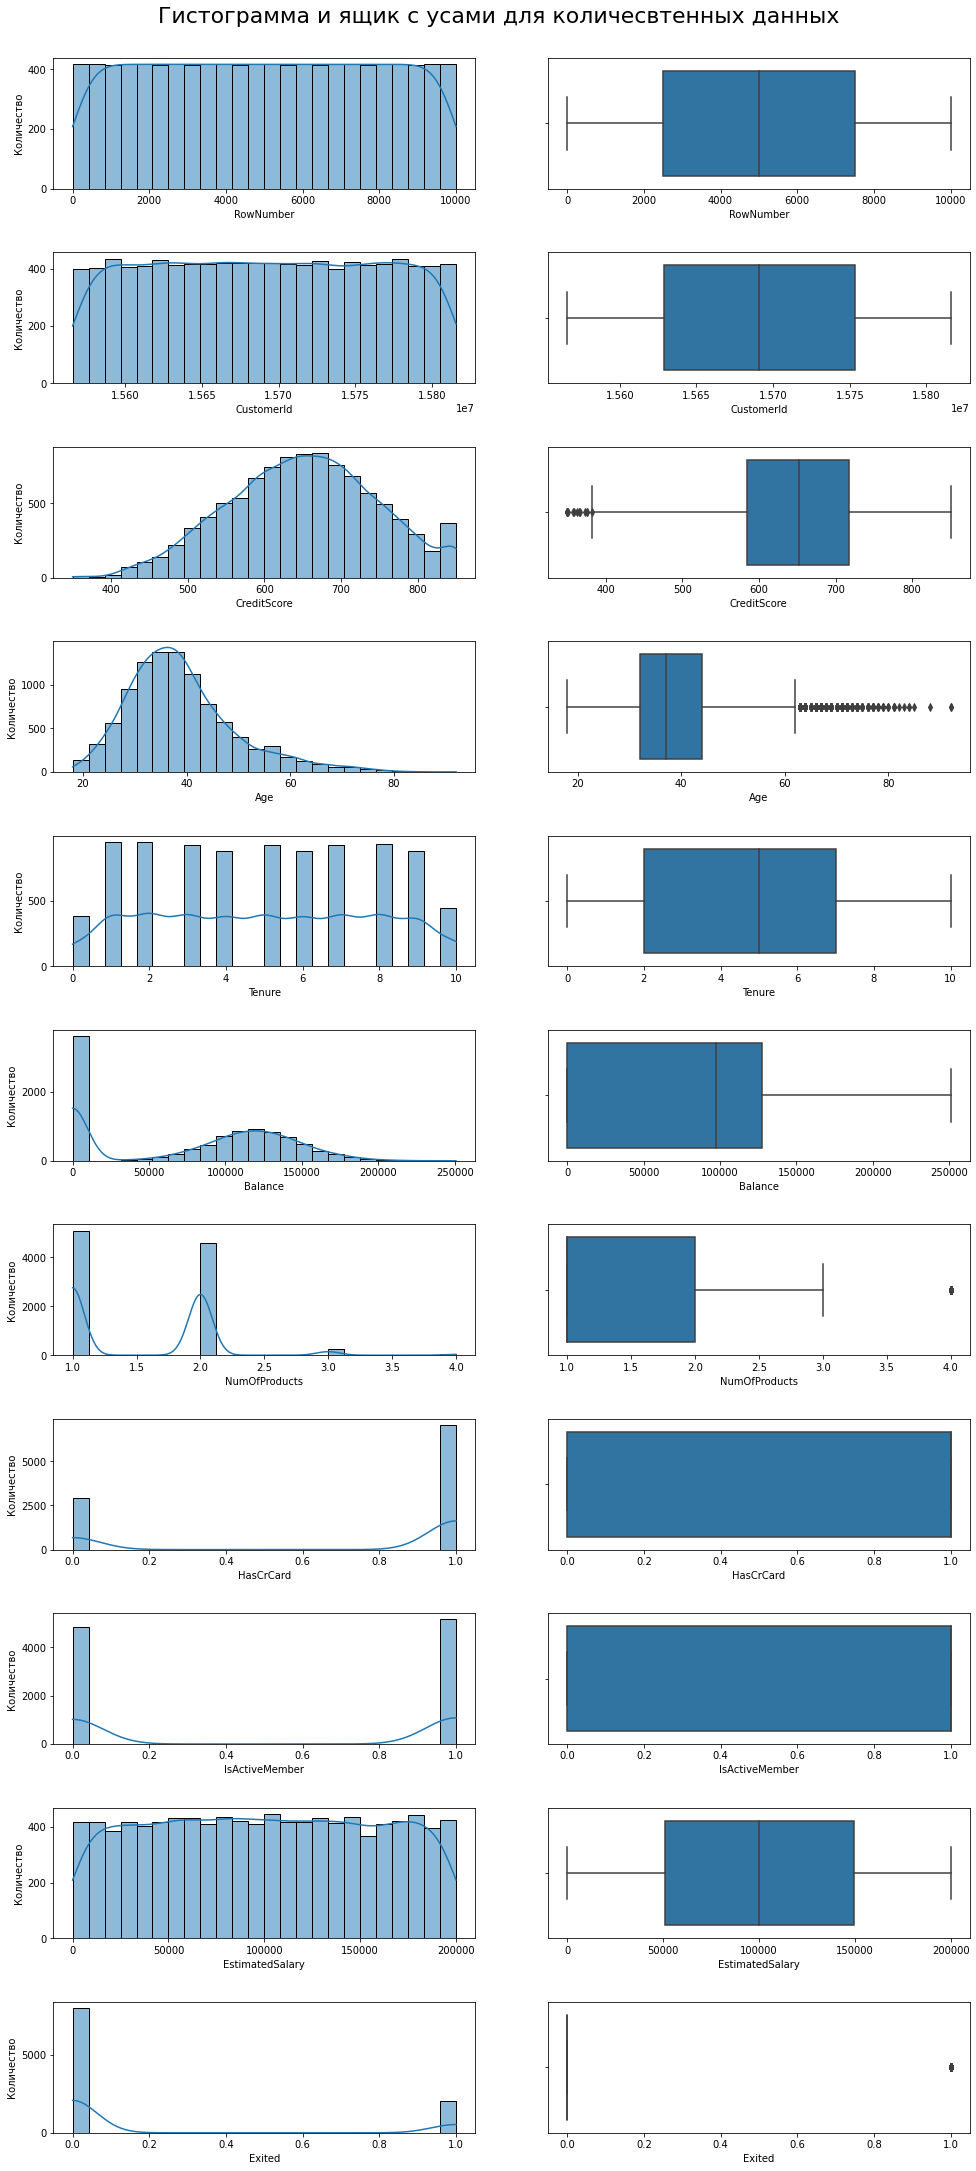

In [ ]:
plot_hist(df, df.select_dtypes(exclude=[object]).columns)

In [ ]:
# Приведение названий столбцов к змеиному виду

df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(',', '_')

# ПРОВЕРКА ОТРАБОТКИ КОДА
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Так на много лучше

In [ ]:
# Посмотрим на пропуски

df['tenure'].unique()


array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [ ]:
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [ ]:
df[df['tenure'].isna()]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


Итак, нужно принять решение что сделать с пропусками. Заменить на ноль, удалить или заполнить медианой.
Если заменим на нули, это будет значить что гитотетически прирост клиентов в этом году составил 1291 клиента, почти 13%. Скорее всего тогда этой той бы задачи не было. Удалить 9% данных, может повлиять на анализ. Медиана равна 5 лет. Но решение принять надо. Или же рандомным методом и визуализируем.

In [ ]:
#df.loc[df['tenure'].isna(), 'tenure'] = df['tenure'].apply(lambda x: np.random.randint(1, 11))
df = df.dropna(subset=['tenure'])

In [ ]:
df[df['tenure'].isna()]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited


Все нормально, код сработал.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

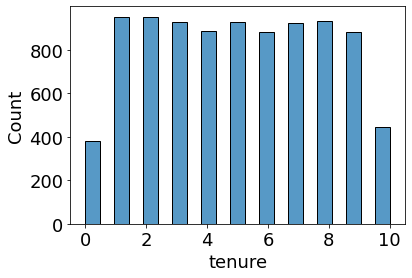

In [ ]:
sns.histplot(df, x = 'tenure')

Похож на начальный график, скорее всего данные не сильно пострадали.

Удалим лишние столбцы из нашей таблицы.

In [ ]:
df = df.drop(['rownumber', 'customerid', 'surname'], axis=1)


In [ ]:
# Посчитаем корреляцию
df.corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.004504,-0.000062,0.002804,0.011090,-0.003937,0.030947,0.005182,-0.023950
age,-0.004504,1.000000,-0.013134,0.031481,-0.031877,-0.014129,0.082269,-0.007037,0.283017
tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
balance,0.002804,0.031481,-0.007911,1.000000,-0.301858,-0.019055,-0.003285,0.014351,0.117218
numofproducts,0.011090,-0.031877,0.011979,-0.301858,1.000000,0.005805,0.009084,0.013990,-0.050271
hascrcard,-0.003937,-0.014129,0.027232,-0.019055,0.005805,1.000000,-0.008810,-0.006136,-0.005411
isactivemember,0.030947,0.082269,-0.032178,-0.003285,0.009084,-0.008810,1.000000,-0.020049,-0.155062
estimatedsalary,0.005182,-0.007037,0.010520,0.014351,0.013990,-0.006136,-0.020049,1.000000,0.016029
exited,-0.023950,0.283017,-0.016761,0.117218,-0.050271,-0.005411,-0.155062,0.016029,1.000000


Корреляцию слабая.Выводы сделать тяжело.

In [ ]:
# применим phik_matrix
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']


,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.00,0.05,0.00,0.00,0.00,0.00,0.04,0.01,0.04,0.04,0.09
geography,0.05,1.00,0.01,0.08,0.00,0.46,0.05,0.01,0.01,0.02,0.11
gender,0.00,0.01,1.00,0.03,0.03,0.01,0.07,0.00,0.04,0.03,0.17
age,0.00,0.08,0.03,1.00,0.05,0.03,0.14,0.03,0.19,0.06,0.49
tenure,0.00,0.00,0.03,0.05,1.00,0.06,0.06,0.03,0.03,0.00,0.02
balance,0.00,0.46,0.01,0.03,0.06,1.00,0.37,0.05,0.00,0.00,0.19
numofproducts,0.04,0.05,0.07,0.14,0.06,0.37,1.00,0.00,0.06,0.03,0.56
hascrcard,0.01,0.01,0.00,0.03,0.03,0.05,0.00,1.00,0.00,0.00,0.00
isactivemember,0.04,0.01,0.04,0.19,0.03,0.00,0.06,0.00,1.00,0.04,0.24
estimatedsalary,0.04,0.02,0.03,0.06,0.00,0.00,0.03,0.00,0.04,1.00,0.00


В данном методе зависимости так же не значительные. Хотя есть и интересные такие как "факт ухода клиента" между возрастом и количеством продуктов банка, используемых клиентом.

## Исследование задачи

In [ ]:
# Еще раз проверим наши данные
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      9091 non-null   int64  
 1   geography        9091 non-null   object 
 2   gender           9091 non-null   object 
 3   age              9091 non-null   int64  
 4   tenure           9091 non-null   float64
 5   balance          9091 non-null   float64
 6   numofproducts    9091 non-null   int64  
 7   hascrcard        9091 non-null   int64  
 8   isactivemember   9091 non-null   int64  
 9   estimatedsalary  9091 non-null   float64
 10  exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


Все нормально, идем дальше.

In [ ]:
df['geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: geography, dtype: int64

In [ ]:
df['gender'].value_counts()

Male      4974
Female    4117
Name: gender, dtype: int64

In [ ]:
# Переведем к бинарному виду
df = pd.get_dummies(df, drop_first= True)
df.head(3)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


In [ ]:
# появились новые столбцы, переведем к единому виду.
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace(',', '_')
df.head(3)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


Раздели на три выборки: обучающая, валидационная, тестовая (60/20/20)

In [ ]:
features = df.drop('exited', axis=1)
target = df['exited']

In [ ]:
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

print('Обучающая выборка     _train', features_train.shape)
print('Валидационная выборка _valid', features_valid.shape)
print('Тестовая выборка       _test', features_test.shape)

Обучающая выборка     _train (5454, 11)
Валидационная выборка _valid (1818, 11)
Тестовая выборка       _test (1819, 11)


### Масштабируем признаки

In [ ]:
numeric=['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember']
scaler=StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])

Все получилось, идем дальше.

### Рассчитаем Accuracy

In [ ]:
best_model = None
best_result = 0
best_depth = 0

for depth in range(1, 10):
    model_dtc1 = DecisionTreeClassifier(max_depth=depth,random_state=1234) # инициализирум модель DecisionTreeClassifier с параметром random_state=12345 и max_depth=depth
    model_dtc1.fit(features_train, target_train) # обучим модель на тренировочной выборке

    predictions_valid_dtc = model_dtc1.predict(features_valid) # предсказания модели на валидационной выборке
    result = accuracy_score(predictions_valid_dtc, target_valid) # качество модели

    if result > best_result:
        best_model = model_dtc1
        best_result = result
        best_depth = depth


print("Accuracy лучшей модели:", best_result, "Глубина дерева:", best_depth, "Максимальная глубина:", depth)


Accuracy лучшей модели: 0.8586358635863587 Глубина дерева: 6 Максимальная глубина: 9


In [ ]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0

for est in range(1, 15):
    for depth in range (1, 15):
        model_rfc1 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # инициализируйте модель RandomForestRegressor с параметрами random_state=12345, n_estimators=est и max_depth=depth
        model_rfc1.fit(features_train, target_train) # обучите модель на тренировочной выборке

        predictions_valid_rfc = model_rfc1.predict(features_valid) # получите предсказания модели на валидационной выборке
        result = accuracy_score(predictions_valid_rfc, target_valid)

        if result > best_result:
            best_model = model_rfc1
            best_result = result
            best_est = est
            best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)

Accuracy наилучшей модели на валидационной выборке: 0.8646864686468647 Количество деревьев: 14 Максимальная глубина: 14


In [ ]:
model_lr1 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_lr1.fit(features_train, target_train)
prediction_valid_lr = model_lr1.predict(features_valid)
accuracy = accuracy_score(prediction_valid_lr, target_valid)

print("Логистическая регрессия:", accuracy)

Логистическая регрессия: 0.7926292629262927


Слишком большие значения. Было бы замеательно если это была правда.

### Рассчитаем auc-roc

In [ ]:
model_dtc1_ar = model_dtc1.predict_proba(features_valid)
model_dtc1_ar_valid = model_dtc1_ar[:,1]
fpr_dtc1, tpr_dtc1, thresholds = roc_curve(target_valid, model_dtc1_ar_valid)

auc_roc_dtc1 = roc_auc_score(target_valid, model_dtc1_ar_valid)

auc_roc_dtc1

0.8012800571368616

In [ ]:
model_rfc1_ar = model_rfc1.predict_proba(features_valid)
model_rfc1_ar_valid = model_rfc1_ar[:,1]
fpr_rfc1, tpr_rfc1, thresholds = roc_curve(target_valid, model_rfc1_ar_valid)

auc_roc_rfc1 = roc_auc_score(target_valid, model_rfc1_ar_valid)

auc_roc_rfc1

0.844729106113681

In [ ]:
model_lr1_ar = model_lr1.predict_proba(features_valid)
model_lr1_ar_valid = model_lr1_ar[:,1]
fpr_lr1, tpr_lr1, thresholds = roc_curve(target_valid, model_lr1_ar_valid)

auc_roc_lr1 = roc_auc_score(target_valid, model_lr1_ar_valid)

auc_roc_lr1

0.5048163208205325

<Figure size 432x288 with 0 Axes>

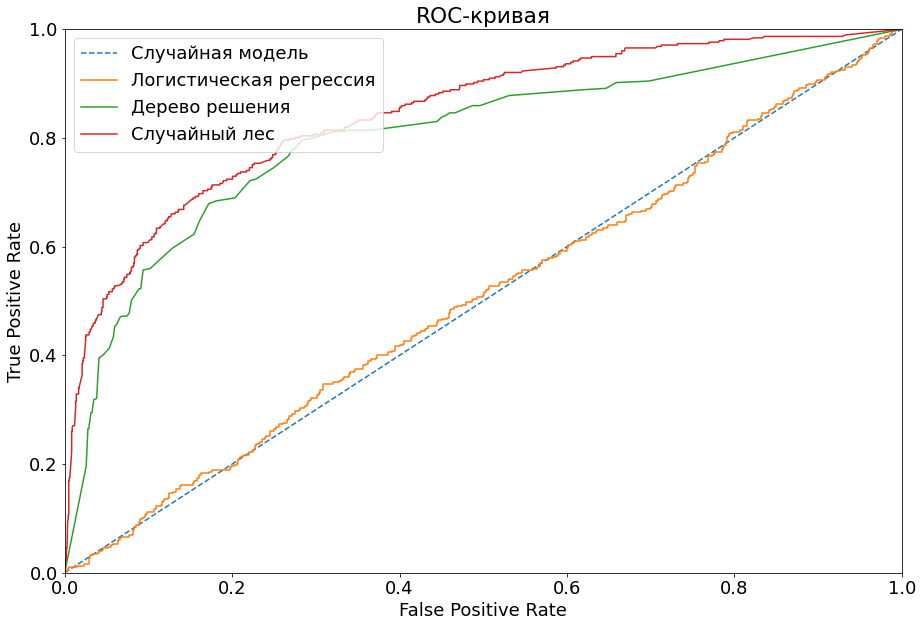

In [ ]:
plt.figure()

plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_lr1, tpr_lr1)
plt.plot(fpr_dtc1, tpr_dtc1)
plt.plot(fpr_rfc1, tpr_rfc1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель', 'Логистическая регрессия', 'Дерево решения', 'Случайный лес'), loc= 'upper left')
plt.show()

Случайный лес стремиться ближе к 1 чем остальные методы.

### Рассчитаем F1 мерики

In [ ]:
# Дерево решений model = DecisionTreeClassifier

best_result_dtc = 0

for depth in range(1,50):
    model_tree = DecisionTreeClassifier(max_depth= depth, random_state=12345).fit(features_train, target_train)
    prediction = model_tree.predict(features_valid)

    result_dtc = f1_score(target_valid, prediction)
    if result_dtc > best_result_dtc:
            best_result_dtc = result_dtc
            best_depth = depth


print('best_depth:', best_depth,'F1:', best_result_dtc)


best_depth: 7 F1: 0.5764331210191083


In [ ]:
best_result_rfc = 0

for depth in range(2,21,2):
    for estim in range(10,101,10):
        model_forest = RandomForestClassifier(max_depth = depth , n_estimators=estim, random_state=12345).fit(features_train, target_train)
        prediction = model_forest.predict(features_valid)
        result_rfc = f1_score(target_valid, prediction)
        if result_rfc > best_result_rfc:
            best_result_rfc = result_rfc
            best_depth = depth
            best_estim = estim

print('F1:', best_result_rfc, 'best_depth:', best_depth, 'best_estim:', best_estim)


F1: 0.594855305466238 best_depth: 18 best_estim: 40


In [ ]:


model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(features_train, target_train)

prediction = model_lr.predict(features_valid)
result_lr = f1_score(target_valid, prediction)

print('F1:', result_lr)



F1: 0.0


Модель Случайного леса показала наилучший результат, а логистическая регрессия показала 0. Это странно.

### Посмотрим на дисбаланс

0    0.796062
1    0.203938
Name: exited, dtype: float64


Text(0.5, 1.0, 'Доля классов целевого признака')

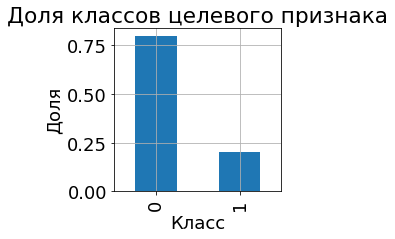

In [ ]:
class_frequency = df['exited'].value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind='bar', grid=True, figsize=(3, 3))
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.title('Доля классов целевого признака')

Почти в 4 раз. Впечатляет. Будем бороться, но это дальше.

## Борьба с дисбалансом

In [ ]:
features, target = shuffle(features, target, random_state=12345)

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [ ]:
features_balance_up, target_balance_up = upsample(features_train, target_train, 4)

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled#

In [ ]:
features_balance_dow, target_balance_dow = downsample(features_train, target_train, 0.25)

1    0.509964
0    0.490036
Name: exited, dtype: float64


Text(0.5, 1.0, 'Доля классов целевого признака')

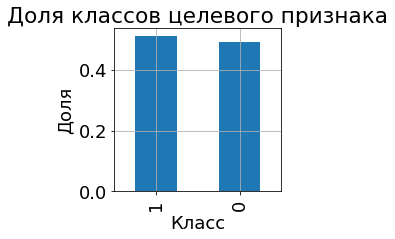

In [ ]:
class_frequency1 = target_balance_up.value_counts(normalize=True)
print(class_frequency1)

class_frequency1.plot(kind='bar', grid=True, figsize=(3, 3))
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.title('Доля классов целевого признака')

In [ ]:
target_balance_up.shape

(8832,)

1    0.509964
0    0.490036
Name: exited, dtype: float64


Text(0.5, 1.0, 'Доля классов целевого признака')

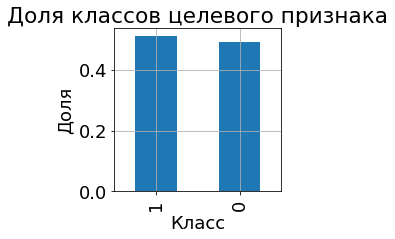

In [ ]:
class_frequency2 = target_balance_dow.value_counts(normalize=True)
print(class_frequency2)

class_frequency2.plot(kind='bar', grid=True, figsize=(3, 3))
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.title('Доля классов целевого признака')

In [ ]:
target_balance_dow.shape

(2208,)

Для баланса пришлось увеличить выборку в 4 раза, но при этом не использовать downsample. Иначе баланса не добиться.

### Посчитаем AUC-ROC и выведем кривые.

In [ ]:
study_forest = model_forest.predict_proba(features_valid)
study_forest_valid = study_forest[:,1]
fpr_forest, tpr_forest, thresholds = roc_curve(target_valid, study_forest_valid)

auc_roc_forest=roc_auc_score(target_valid, study_forest_valid)

auc_roc_forest

0.8628264338977685

In [ ]:

study_tree = model_tree.predict_proba(features_valid)
study_tree_valid = study_tree[:,1]
fpr_tree, tpr_tree, thresholds=roc_curve(target_valid, study_tree_valid)

auc_roc_tree = roc_auc_score(target_valid, study_tree_valid)

auc_roc_tree


0.6797786314764468

In [ ]:
study_lr = model_lr.predict_proba(features_valid)
study_lr_valid = study_lr[:,1]
fpr_log,tpr_log,thresholds=roc_curve(target_valid, study_lr_valid)

auc_roc_lr = roc_auc_score(target_valid, study_lr_valid)

auc_roc_lr


0.5048163208205325

<Figure size 432x288 with 0 Axes>

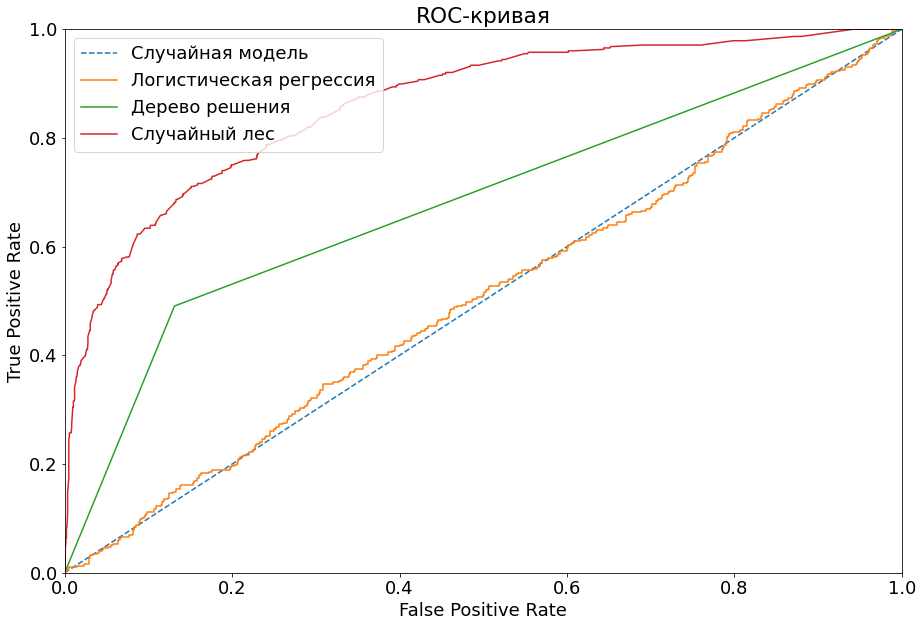

In [ ]:
plt.figure()

plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель', 'Логистическая регрессия', 'Дерево решения', 'Случайный лес'), loc= 'upper left')
plt.show()

Как и в предыдущем Случайный лес показывает более высокий рзультат, стремление к 1. Но очень странная кривая у Дерева решений.

### Обучаем после балансировки

In [ ]:
best_result_bal = 0

for depth in range(1,50):
    model_tree_bal = DecisionTreeClassifier(max_depth= depth, random_state=12345).fit(features_balance_up, target_balance_up)
    prediction = model_tree_bal.predict(features_valid)

    result_bal = f1_score(target_valid, prediction)
    if result_bal > best_result_bal:
            best_result_bal = result_bal
            best_depth = depth


print('best_depth:', best_depth,'F1:', best_result_bal)

# features_balance_up, target_balance_up

best_depth: 5 F1: 0.5735449735449736


In [ ]:
# Код выполняется пол часа
best_result_bal = 0

for depth in range(2,21,2):
    for estim in range(10,101,10):
        model_forest_bal = RandomForestClassifier(max_depth = depth , n_estimators=estim, random_state=12345).fit(features_balance_up, target_balance_up)
        prediction = model_forest_bal.predict(features_valid)
        result_bal = f1_score(target_valid, prediction)
        if result_bal > best_result_bal:
            best_result_bal = result_bal
            best_depth = depth
            best_estim = estim

print('F1:', best_result_bal, 'best_depth:', best_depth, 'best_estim:', best_estim)


F1: 0.6395663956639566 best_depth: 14 best_estim: 80


In [ ]:


model_lr_bal = LogisticRegression(solver='liblinear')
model_lr_bal.fit(features_balance_up, target_balance_up)

prediction = model_lr_bal.predict(features_valid)
result_bal = f1_score(target_valid, prediction)

print('F1:', result_bal)



F1: 0.47676419965576594


3 из 3 метод Случайного леса показывает наилучший результат.

In [ ]:
best_result_bal_dow = 0

for depth in range(1,50):
    model_tree_bal_dow = DecisionTreeClassifier(max_depth= depth, random_state=12345).fit(features_balance_dow, target_balance_dow)
    prediction = model_tree_bal_dow.predict(features_valid)

    result_bal_dow = f1_score(target_valid, prediction)
    if result_bal_dow > best_result_bal_dow:
            best_result_bal_dow = result_bal_dow
            best_depth = depth


print('best_depth:', best_depth,'F1:', best_result_bal_dow)

# features_balance_dow, target_balance_dow

best_depth: 6 F1: 0.5636704119850188


In [ ]:
best_result_bal_down = 0

for depth in range(2,21,2):
    for estim in range(10,101,10):
        model_forest_bal_down = RandomForestClassifier(max_depth = depth , n_estimators=estim, random_state=12345).fit(features_balance_dow, target_balance_dow)
        prediction = model_forest_bal_down.predict(features_valid)
        result_bal_down = f1_score(target_valid, prediction)
        if result_bal_down > best_result_bal_down:
            best_result_bal_down = result_bal_down
            best_depth = depth
            best_estim = estim

print('F1:', best_result_bal_down, 'best_depth:', best_depth, 'best_estim:', best_estim)

F1: 0.6072874493927125 best_depth: 8 best_estim: 40


## Тестирование модели

### Для тестирования моделей возьмем гиперпараметры полученные из предыдущего упражнения и протестируем на Случайном лесе.

In [ ]:
model_forest_fin = RandomForestClassifier(max_depth = 8 , n_estimators = 50, random_state=12345).fit(features_balance_up, target_balance_up)
prediction = model_forest_bal.predict(features_test)
result_bal_fin = f1_score(target_test, prediction)

print(f'Итог F1: {result_bal_fin.round(4)} при depth = 8 и n_estimators = 50 ')

Итог F1: 0.6074 при depth = 8 и n_estimators = 50 


Получилось добиться результата 0,59 методом Случайного леса с гиперпараметрами depth = 8 и n_estimators = 50

### Посмотрим auc-roc для нашего финального метода

In [ ]:

study_forest_fin = model_forest_fin.predict_proba(features_test)
study_forest_test_fin = study_forest_fin[:,1]
fpr_forest_fin, tpr_forest_fin, thresholds = roc_curve(target_test, study_forest_test_fin)

auc_roc_forest_fin = roc_auc_score(target_test, study_forest_test_fin)

auc_roc_forest_fin

0.8588016333247941

<Figure size 432x288 with 0 Axes>

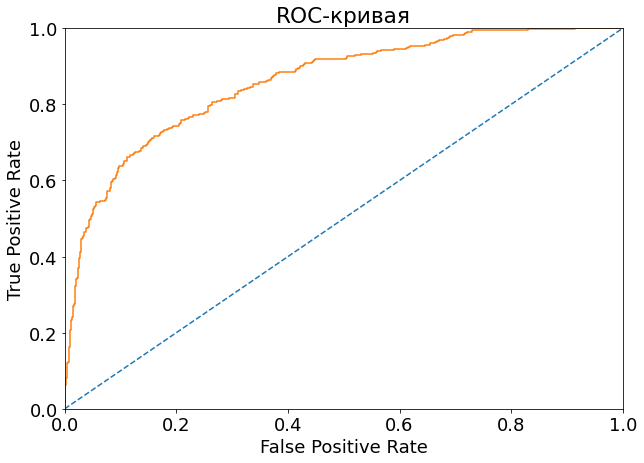

In [ ]:
plt.figure()

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_forest_fin, tpr_forest_fin)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

### Вывод:

Подведем итог. Мы провели большую работу. В первую очередь мы проверили качество данных на дубликаты, пропуски и тд, а так же визуализировали наши данные. Провели небольшую предобработку, а именно заменили пропущенные значения в Tenure на рандомным методом, наиболее актуальный для нашего случая, удалили лишние данные и привели названия столбцов к змеиному виду.
Для обучения моделей мы разбиваем на три выборки Обучающая выборка, Валидационная выборка и Тестовая выборка. Для чистоты обучения мы обучили модель на сырых данных, результат впечатляющий. После применили масштабирование данных и так же обучили с использованием тех же методов и в первом случае, при построении AUC-ROC мы так же увидели, что метод Случайного леса болле эффективный. Далее посмотрев дисбаланс, он в нашем случае составил почти в 5 раз, отбалансировали данные, практически 50/50. Обучив модели уже с обработанными данными, так же сделали выводы, что модель случайного леса и примененные гиперпараметры показала наилучший результат.

С уважением,

Нестеров А.